In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations
import seaborn as sns



ACTS = [ACT0, ACT1, ACT2]


In [208]:
def get_thr(act):
    return {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]


def add_threshold(df, act, t):
    thr = {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]
    df[thr] = df[act]
    df[thr] = df[thr].apply(lambda x: x if x >= t else np.nan)
    return df


def make_df(data):
    df_list = []
    for d in data:
        df_temp = pd.read_csv(d['file'])

        df_temp = df_temp[df_temp[DIST] < 20]
        df_temp[DIST] = df_temp[DIST].apply(lambda x: - x)
        df_temp[LABEL] = d['label']
        df_temp['color'] = d['color']

        for a in ACTS:
            df_temp[a] = df_temp[a].apply(clean_activations)
            df_temp[a] = df_temp[a].apply(np.median)

        df_list.append(df_temp)
    return df_list


def show(data_list, mean=False, median=False, norm=False, thrs=False, save=False):
    labels = {ACT0: 'Left camera', ACT1: 'Center camera', ACT2: 'Right camera'}

    fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
    for data in data_list:
        for i, act in enumerate(ACTS):                
            
            if norm:
                data[act] = data[act].apply(lambda x: float(x) / norm[i])

            axs[i].plot(data[DIST], data[act], label='_nolegend_', color=data['color'].iloc[0], alpha=0.5)
            axs[i].set_title(labels[act])

            if thrs:
                data = add_threshold(data, act, thrs[i])
                thr_act = data[get_thr(act)]
                axs[i].plot(data[DIST], [thrs[i],] * len(data[DIST]), '--', color='gray', label='Threshold=1.6')
                axs[i].plot(data[DIST], thr_act, color=data['color'].iloc[0], label=data['label'].iloc[0])

            if mean:
                mean_line = [np.mean(data[act]),] * len(data[act])
                axs[i].plot(data[DIST], mean_line, label='Mean')

            if median:
                median_line = [np.median(data[act]),] * len(data[act])
                axs[i].plot(data[DIST], median_line, label='Median')

            axs[i].set_xlabel('Distance (m)')
            axs[i].set_ylabel('Activation')
        axs[1].legend()

    #fig.suptitle('Activations for the left, center and right cameras')
    plt.show()
    if save:
        plt.savefig('figs/' + save + '.pdf')

## No obstacle

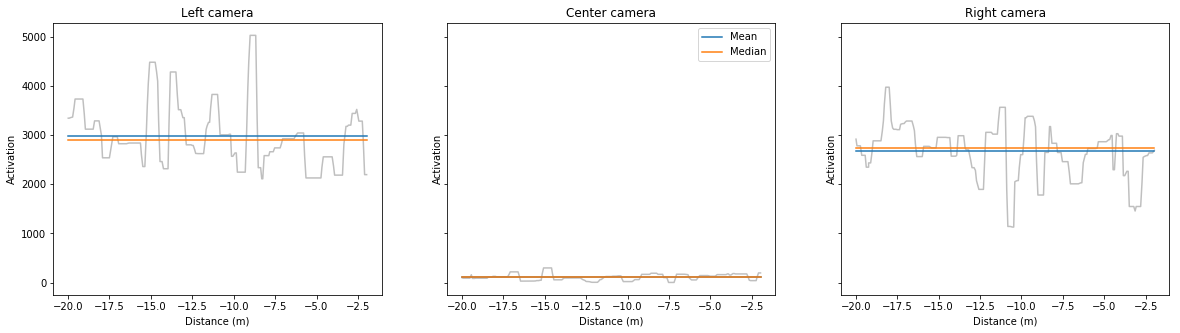

In [209]:
data = [
    {
        'file': 'csv/0-no-obstacle-0.csv',
        'label': 'No tree',
        'color': 'gray'
    }
]


df_list = make_df(data)
show(df_list, mean=True, median=True)

## Thresholds and constants

In [210]:
thrs = [1.6, 1.6, 1.6]
norm = [3000, 400, 3800]

## With obstacles

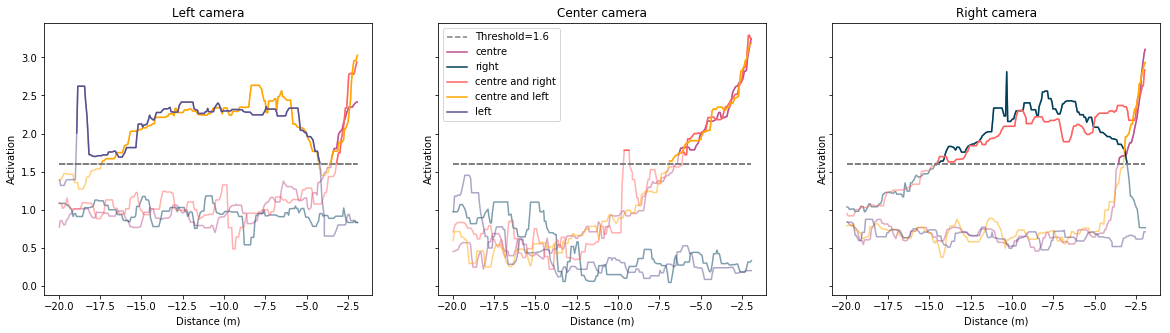

In [211]:
data = [
    {
        'file': 'csv/0-central-obstacle-0.csv',
        'label': 'centre',
        'color': '#bc5090'
    },
    {
        'file': 'csv/0-right-obstacle-0.csv',
        'label': 'right',
        'color': '#003f5c'
    },
    {
        'file': 'csv/0-right-central-obstacle-0.csv',
        'label': 'centre and right',
        'color': '#ff6361'
    },
    {
        'file': 'csv/0-left-central-obstacle-0.csv',
        'label': 'centre and left',
        'color': '#ffa600'
    },
    {
        'file': 'csv/0-left-obstacle-0.csv',
        'label': 'left',
        'color': '#58508d'
    }
]

df_list = make_df(data)
save = 'activation-obstacles'
show(df_list, norm=norm, thrs=thrs, save=save)


## Right obstacle only

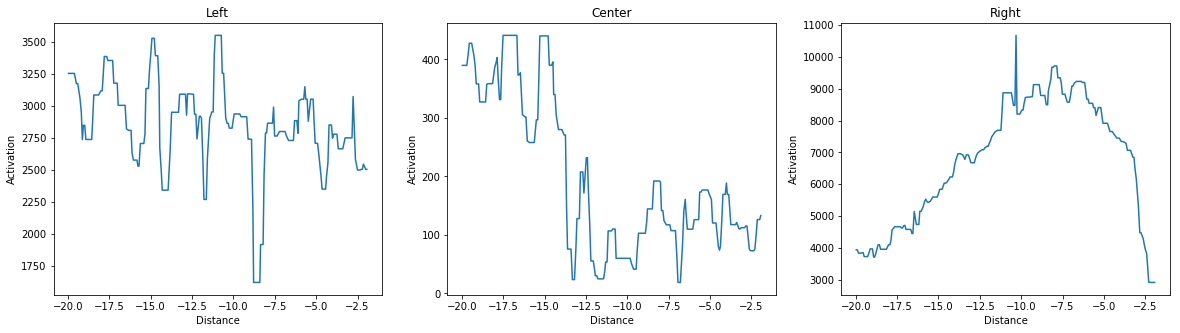


  - activation_0:

    - Mean: 2849.05
    - Median: 2863.24
    - Std: 351.33

  - activation_1:

    - Mean: 197.36
    - Median: 141.61
    - Std: 133.26

  - activation_2:

    - Mean: 6755.58
    - Median: 7064.42
    - Std: 1941.88




In [28]:
data = [
    {
        'file': 'csv/0-right-obstacle-0.csv',
        'label': 'right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Right and central obstacle

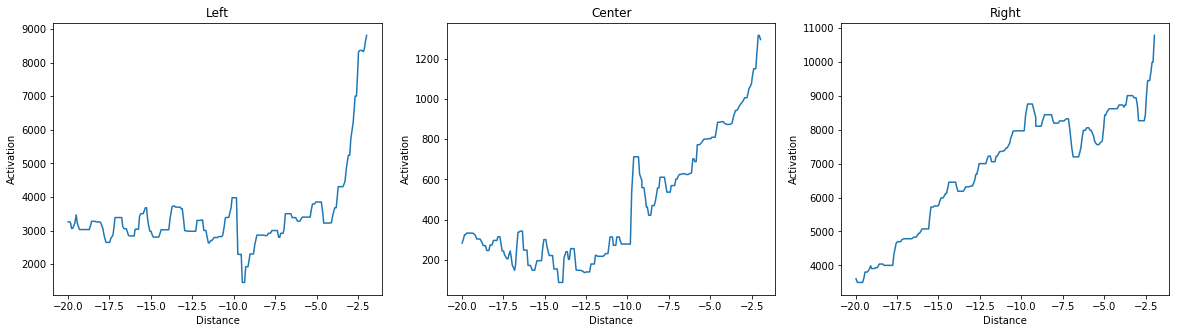


  - activation_0:

    - Mean: 3435.67
    - Median: 3225.78
    - Std: 1176.95

  - activation_1:

    - Mean: 463.07
    - Median: 315.53
    - Std: 296.62

  - activation_2:

    - Mean: 6868.92
    - Median: 7283.51
    - Std: 1711.67




In [29]:
data = [
    {
        'file': 'csv/0-right-central-obstacle-0.csv',
        'label': 'center and right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Left obstacle only

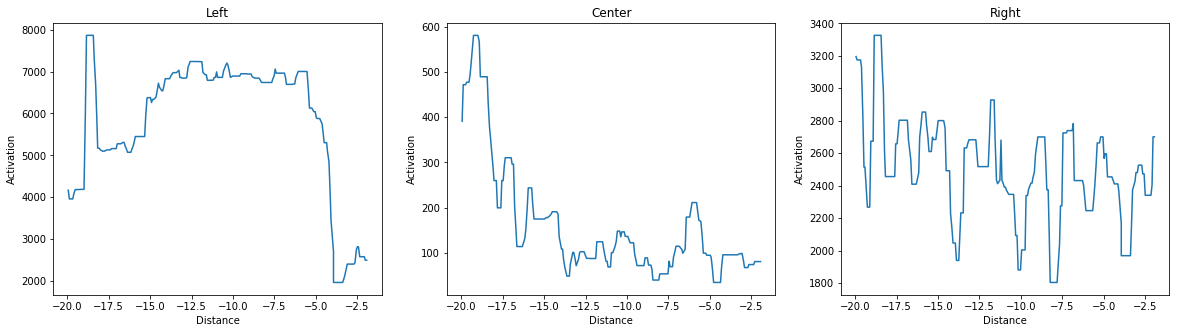


  - activation_0:

    - Mean: 5812.78
    - Median: 6694.63
    - Std: 1561.92

  - activation_1:

    - Mean: 162.02
    - Median: 108.48
    - Std: 129.16

  - activation_2:

    - Mean: 2497.39
    - Median: 2480.26
    - Std: 312.43




In [33]:
data = [
    {
        'file': 'csv/0-left-obstacle-0.csv',
        'label': 'left tree'
    }
]

df = make_df(data)
show(df, thr=False)


## Left and center obstacle

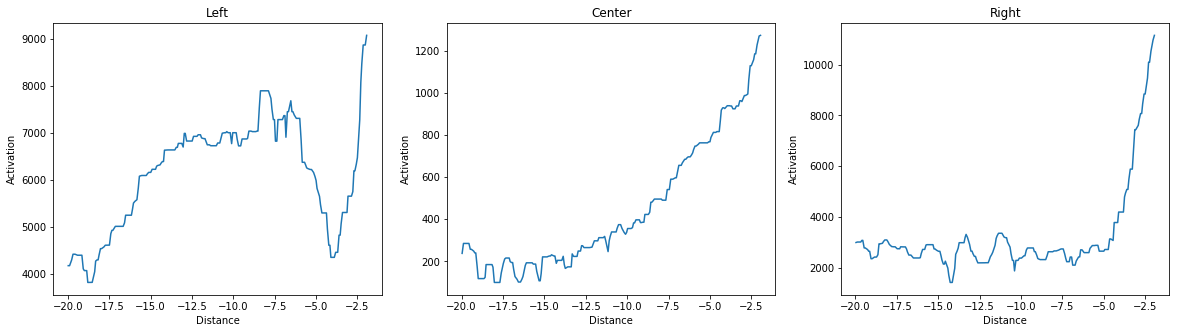


  - activation_0:

    - Mean: 6150.66
    - Median: 6393.47
    - Std: 1154.17

  - activation_1:

    - Mean: 445.44
    - Median: 329.02
    - Std: 301.32

  - activation_2:

    - Mean: 3223.11
    - Median: 2729.43
    - Std: 1727.85




In [34]:
data = [
    {
        'file': 'csv/0-left-central-obstacle-0.csv',
        'label': 'center and left tree'
    }
]

df = make_df(data)
show(df, thr=False)
